In [ ]:
import tensorflow as tf
import random
from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)  # reproducibility

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset

# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

# input place holders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

# dropout (keep_prob) rate  0.7~0.5 on training, but should be 1 for testing
keep_prob = tf.placeholder(tf.float32)
from tensorflow.python.framework import ops
ops.reset_default_graph()

# weights & bias for nn layers
with tf.variable_scope('layer1') as scope:
    W1 = tf.get_variable("W", shape=[784, 512],
                         initializer=tf.contrib.layers.xavier_initializer())
    b1 = tf.Variable(tf.random_normal([512]))
    L1 = tf.nn.relu(tf.matmul(X, W1) + b1)
    L1 = tf.nn.dropout(L1, keep_prob=keep_prob)
    
    tf.summary.histogram('X',X)
    tf.summary.histogram('w1',W1)
    tf.summary.histogram('b1',b1)
    tf.summary.histogram('layer1',L1)

with tf.variable_scope('layer2') as scope:
    W2 = tf.get_variable("W", shape=[512, 512],
                         initializer=tf.contrib.layers.xavier_initializer())
    b2 = tf.Variable(tf.random_normal([512]))
    L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)
    L2 = tf.nn.dropout(L2, keep_prob=keep_prob)
    tf.summary.histogram('w2',W2)
    tf.summary.histogram('b2',b2)
    tf.summary.histogram('layer2',L2)
    
with tf.variable_scope('layer3') as scope:
    W3 = tf.get_variable("W", shape=[512, 512],
                         initializer=tf.contrib.layers.xavier_initializer())
    b3 = tf.Variable(tf.random_normal([512]))
    L3 = tf.nn.relu(tf.matmul(L2, W3) + b3)
    L3 = tf.nn.dropout(L3, keep_prob=keep_prob)
    tf.summary.histogram('w2',W2)
    tf.summary.histogram('b2',b2)
    tf.summary.histogram('layer2',L2)
    
with tf.variable_scope('layer4') as scope:
    W4 = tf.get_variable("W", shape=[512, 512],
                         initializer=tf.contrib.layers.xavier_initializer())
    b4 = tf.Variable(tf.random_normal([512]))
    L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)
    L4 = tf.nn.dropout(L4, keep_prob=keep_prob)
    tf.summary.histogram('w2',W2)
    tf.summary.histogram('b2',b2)
    tf.summary.histogram('layer2',L2)
with tf.variable_scope('layer5') as scope:
    W5 = tf.get_variable("W", shape=[512, 10],
                         initializer=tf.contrib.layers.xavier_initializer())
    b5 = tf.Variable(tf.random_normal([10]))
    hypothesis = tf.matmul(L4, W5) + b5
    
    tf.summary.histogram('w5',W5)
    tf.summary.histogram('b5',b5)
    tf.summary.histogram('logits',hypothesis)

print('w1 , w5 = ',W1,',', W5)

# define cost/loss & optimizer
# More name scopes will clean up graph representation
with tf.name_scope("loss_function") as scope:
    # Minimize error using cross entropy
    # Cross entropy
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels=Y))
    # Create a summary to monitor the cost function
    tf.summary.scalar("loss_function", loss)
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)
# optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)

# initialize
init = tf.global_variables_initializer()
merged_summary = tf.summary.merge_all()


In [12]:

#tensorboard
sess = tf.Session()
sess.run(init)
summary_writer=tf.summary.FileWriter('/graphs',graph_def=sess.graph_def)

# train my model
global_step =0
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys, keep_prob: 0.7}
        s,l,_ =sess.run([summary,loss,optimizer], feed_dict=feed_dict)
        loss_summ = tf.summary.scalar('loss',loss)
        summary_str = sess.run(merged_summary, feed_dict={x: batch_xs, y: batch_ys})
        summary_writer.add_summary(summary_str, epoch * total_batch + i)
        global_step +=1

        avg_cost += sess.run(loss, feed_dict=feed_dict)/ total_batch
        
    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.6f}'.format(avg_cost))

print('Learning Finished!')
'''
# Add summary scalar node
acc_summ = tf.summary.scalar('accuracy',accuracy)


#Collect all summaries
merged_summary = tf.summary.merge([acc_summ, loss_summ])]

summ_writer = tf.summary.FileWriter(dir_path)

# session run (To be put inside batch-loop to log loss for each batch)
summary = session.run([merged_summary], feed_dict='your input')
summ_writer.add_summary(summary, global_step)

# Finally close the writer
summ_writer.close()
writer.close()
'''

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
w1 , w5 =  <tf.Variable 'layer1/W:0' shape=(784, 512) dtype=float32_ref> , <tf.Variable 'layer5/W:0' shape=(512, 10) dtype=float32_ref>
Epoch: 0001 cost = 0.437209
Epoch: 0002 cost = 0.159190
Epoch: 0003 cost = 0.120703
Epoch: 0004 cost = 0.099932
Epoch: 0005 cost = 0.085817
Epoch: 0006 cost = 0.077048
Epoch: 0007 cost = 0.067017
Epoch: 0008 cost = 0.063526
Epoch: 0009 cost = 0.056375
Epoch: 0010 cost = 0.051378
Epoch: 0011 cost = 0.052023
Epoch: 0012 cost = 0.044956
Epoch: 0013 cost = 0.043594
Epoch: 0014 cost = 0.043045
Epoch: 0015 cost = 0.041593
Learning Finished!


In [ ]:
## EX2~2

from tensorflow.python.framework import ops
ops.reset_default_graph()
import tensorflow as tf
import random
# import matplotlib.pyplot as plt
import os

from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)  # reproducibility

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset

# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

CHECK_POINT_DIR = TB_SUMMARY_DIR = './tb/mnist3'


# input place holders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

# Image input
x_image = tf.reshape(X, [-1, 28, 28, 1])
tf.summary.image('input', x_image, 3)

# dropout (keep_prob) rate  0.7~0.5 on training, but should be 1 for testing
keep_prob = tf.placeholder(tf.float32)

# weights & bias for nn layers
# http://stackoverflow.com/questions/33640581/how-to-do-xavier-initialization-on-tensorflow
with tf.variable_scope('layer1'):
    W1 = tf.get_variable("W", shape=[784, 512],
                         initializer=tf.contrib.layers.xavier_initializer())
    b1 = tf.Variable(tf.random_normal([512]))
    L1 = tf.nn.relu(tf.matmul(X, W1) + b1)
    L1 = tf.nn.dropout(L1, keep_prob=keep_prob)

    tf.summary.histogram("X", X)
    tf.summary.histogram("weights", W1)
    tf.summary.histogram("bias", b1)
    tf.summary.histogram("layer", L1)

with tf.variable_scope('layer2'):
    W2 = tf.get_variable("W", shape=[512, 512],
                         initializer=tf.contrib.layers.xavier_initializer())
    b2 = tf.Variable(tf.random_normal([512]))
    L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)
    L2 = tf.nn.dropout(L2, keep_prob=keep_prob)

    tf.summary.histogram("weights", W2)
    tf.summary.histogram("bias", b2)
    tf.summary.histogram("layer", L2)

with tf.variable_scope('layer3'):
    W3 = tf.get_variable("W", shape=[512, 512],
                         initializer=tf.contrib.layers.xavier_initializer())
    b3 = tf.Variable(tf.random_normal([512]))
    L3 = tf.nn.relu(tf.matmul(L2, W3) + b3)
    L3 = tf.nn.dropout(L3, keep_prob=keep_prob)

    tf.summary.histogram("weights", W3)
    tf.summary.histogram("bias", b3)
    tf.summary.histogram("layer", L3)

with tf.variable_scope('layer4'):
    W4 = tf.get_variable("W", shape=[512, 512],
                         initializer=tf.contrib.layers.xavier_initializer())
    b4 = tf.Variable(tf.random_normal([512]))
    L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)
    L4 = tf.nn.dropout(L4, keep_prob=keep_prob)

    tf.summary.histogram("weights", W4)
    tf.summary.histogram("bias", b4)
    tf.summary.histogram("layer", L4)

with tf.variable_scope('layer5'):
    W5 = tf.get_variable("W", shape=[512, 10],
                         initializer=tf.contrib.layers.xavier_initializer())
    b5 = tf.Variable(tf.random_normal([10]))
    hypothesis = tf.matmul(L4, W5) + b5

    tf.summary.histogram("weights", W5)
    tf.summary.histogram("bias", b5)
    tf.summary.histogram("hypothesis", hypothesis)


# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

tf.summary.scalar("loss", cost)

last_epoch = tf.Variable(0, name='last_epoch')

# Summary
summary = tf.summary.merge_all()

# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# Create summary writer
writer = tf.summary.FileWriter(TB_SUMMARY_DIR)
writer.add_graph(sess.graph)
global_step = 0

# Saver and Restore
saver = tf.train.Saver()
checkpoint = tf.train.get_checkpoint_state(CHECK_POINT_DIR)

if checkpoint and checkpoint.model_checkpoint_path:
    try:
        saver.restore(sess, checkpoint.model_checkpoint_path)
        print("Successfully loaded:", checkpoint.model_checkpoint_path)
    except:
        print("Error on loading old network weights")
else:
    print("Could not find old network weights")

start_from = sess.run(last_epoch)

# train my model
print('Start learning from:', start_from)

for epoch in range(start_from, training_epochs):
    print('Start Epoch:', epoch)

    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys, keep_prob: 0.7}
        s, _ = sess.run([summary, optimizer], feed_dict=feed_dict)
        writer.add_summary(s, global_step=global_step)
        global_step += 1

        avg_cost += sess.run(cost, feed_dict=feed_dict) / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

    print("Saving network...")
    sess.run(last_epoch.assign(epoch + 1))
    if not os.path.exists(CHECK_POINT_DIR):
        os.makedirs(CHECK_POINT_DIR)
    saver.save(sess, CHECK_POINT_DIR + "/model", global_step=i)

print('Learning Finished!')

# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1}))

# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1], keep_prob: 1}))

# plt.imshow(mnist.test.images[r:r + 1].
#           reshape(28, 28), cmap='Greys', interpolation='nearest')
# plt.show()

'''

...

Successfully loaded: ./tb/mnist/model-549
Start learning from: 2
Epoch: 2

...
tensorboard --logdir tb/
Starting TensorBoard b'41' on port 6006
(You can navigate to http://10.0.1.4:6006)

'''

Accuracy: 0.982
Label:  [2]
Prediction:  [2]


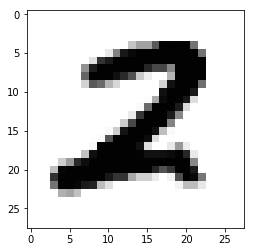

In [15]:

%matplotlib inline
import matplotlib.pyplot as plt

# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1}))

# # Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1], keep_prob: 1}))

plt.imshow(mnist.test.images[r:r + 1].
          reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()



In [16]:
#ex2
from tensorflow.python.framework import ops
ops.reset_default_graph()
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
#par
learning_rate=0.001
training_epochs=15
batch_size=128
SUMMARY_DIR = './mnist'

#load
MNIST = input_data.read_data_sets("./MNIST_data",one_hot=True)

with tf.name_scope('input') as scope:
    X = tf.placeholder(tf.float32, [None,784],name='image')
    y = tf.placeholder(tf.float32,[None,10],name = 'label')

with tf.variable_scope('layer1') as scope :
    W1 = tf.get_variable("W",shape=[784,512],initializer = tf.contrib.layers.xavier_initializer())
    b1 = tf.Variable(tf.random_normal([512]))
    L1 = tf.nn.relu(tf.add(tf.matmul(X,W1),b1))
    
    tf.summary.histogram("X",X)
    tf.summary.histogram("weights",W1)
    tf.summary.histogram("bias",b1)
    tf.summary.histogram("layer",L1)
    
with tf.variable_scope('layer2') as scope:
    W2 = tf.get_variable("W",shape=[512,10],initializer = tf.contrib.layers.xavier_initializer())
    b2 = tf.Variable(tf.random_normal([10]))
    y_=tf.add(tf.matmul(L1,W2),b2)
    
    tf.summary.histogram("weights",W2)
    tf.summary.histogram("bias",b2)
    tf.summary.histogram("logits",y_)


def get_train_batch(batch_size,fake_data =False):
    if fake_data:
        fake_image = [1] * 784
        if self.one_hot:

            fake_label = [1] + [0] * 9

        else:
            fake_label = 0
        return [fake_image for _ in xrange(batch_size)], [fake_label for _ in xrange(batch_size)]
    choice = np.random.randint(low = 0, high = MNIST.train.num_examples)
    start = choice
    e = start + batch_size
    if(e> MNIST.train_num_examples) :
        end = MNIST.train_num-examples -1
    else :
        end = e
    return MNIST.train._images[start:end], MNIST.train._labels[start:end]
    


loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_,labels=y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)
summary=tf.summary.merge_all()
global_step =0
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    writer = tf.summary.FileWriter(SUMMARY_DIR,sess.graph)
    for epoch in range(training_epochs):
        total_batch=int(MNIST.train.num_examples/batch_size)
        avg_loss=0
        
        for i in range(total_batch):
            batch_xs,batch_ys = get_train_batch(batch_size)
            feed_dict = {X: batch_xs, y: batch_ys}
            s,l, _ = sess.run([summary,loss,optimizer],feed_dict=feed_dict)
            writer.add_summary(s,global_step=global_step)
            global_step+=1
            avg_loss +=l
        print('Epoch:','%02d'%(epoch+1),'loss=','{:.6f}'.format(avg_loss/total_batch0))
        
    correction_prediction = tf.equal(tf.argmax(y_,1),tf.argmax(y,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
    acc = sess.run(accuracy,feed_dict={X: MNIST.test.images,y:MNIST.test.labels})
    print('Test accuracy:',acc)
writer.close()

Extracting ./MNIST_data\train-images-idx3-ubyte.gz
Extracting ./MNIST_data\train-labels-idx1-ubyte.gz
Extracting ./MNIST_data\t10k-images-idx3-ubyte.gz
Extracting ./MNIST_data\t10k-labels-idx1-ubyte.gz


AttributeError: 'Datasets' object has no attribute 'train_x'